<a href="https://colab.research.google.com/github/arifpras/ExpectedDemand/blob/main/20240121_podem01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

  <h1> Predicting Demand in the Primary Market: Pycaret</h1>
</div>

<div class="markdown-google-sans">

## <strong> Data Preparation </strong>
</div>

## Libraries

In [1]:
%%capture

# %pip install openpyxl
# %pip install shap
# %pip install pycaret

!pip show pycaret || pip install pycaret

In [2]:
# Subsequent cells can use the installed library
import pycaret
pycaret.__version__

'3.2.0'

In [3]:
from pycaret.regression import *

import numpy as np
import pandas as pd
import openpyxl as xl
import matplotlib.pyplot as plt
import seaborn as sns

## Database

### Load

In [6]:
df_train00 = pd.read_excel('/content/drive/MyDrive/00database/db_monthfrac.xlsx', sheet_name='database')
df_train00['incoming_bid'] = df_train00['incoming_bid'].astype(float)
df_train00['issuance_date'] = pd.to_datetime(df_train00['issuance_date'], format='%d/%m/%Y')

df_train00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issued_series     1895 non-null   object        
 1   issuance_date     1895 non-null   datetime64[ns]
 2   issuance_year     1895 non-null   int64         
 3   issuance_week     1895 non-null   int64         
 4   monthfrac         1895 non-null   int64         
 5   eid_weeks         1895 non-null   int64         
 6   srbi_issuance     1895 non-null   int64         
 7   vix_indicator     1895 non-null   int64         
 8   bi_covid          1895 non-null   int64         
 9   gso_issuance      1895 non-null   int64         
 10  investment_grade  1895 non-null   int64         
 11  incoming_bid      1895 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 177.8+ KB


In [7]:
df_train00['issued_series'].value_counts()

sun10    292
sun20    287
spn12    272
sun15    272
sun05    266
spn03    238
sun30    170
spn09     76
sun07     11
sun08      8
sun04      1
vr04       1
sun02      1
Name: issued_series, dtype: int64

In [8]:
df_train00.describe()

,issuance_year,issuance_week,monthfrac,eid_weeks,srbi_issuance,vix_indicator,bi_covid,gso_issuance,investment_grade,incoming_bid
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1.895000e+03
mean,2017.138786,24.665963,124.200000,0.083905,0.030079,0.082322,0.249077,0.022691,0.860158,6.266693e+06
std,4.273546,14.044122,108.293944,0.277318,0.170850,0.274927,0.432592,0.148957,0.346914,5.924715e+06
min,2009.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.367000e+06
50%,2018.000000,25.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.400000e+06
75%,2021.000000,37.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.997500e+06
max,2024.000000,51.000000,367.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.516780e+07


<Axes: xlabel='incoming_bid', ylabel='issuance_week'>

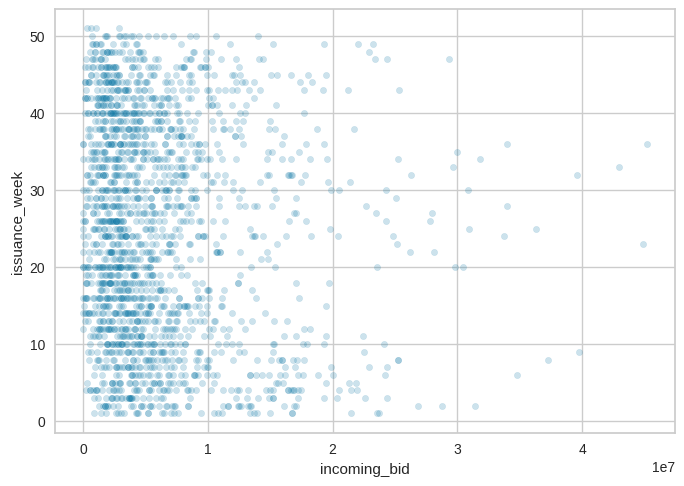

In [9]:
df_train00.plot(kind = 'scatter', x = 'incoming_bid', y = 'issuance_week', alpha = 0.2)

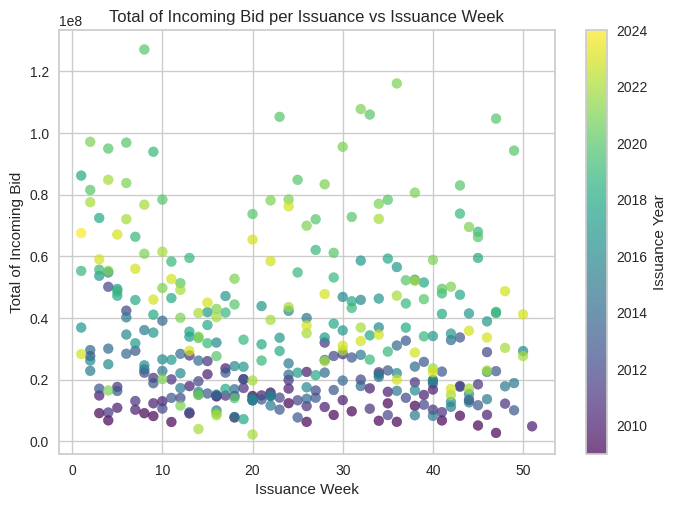

In [10]:
# import matplotlib.pyplot as plt

grouped_series01 = df_train00.groupby(['issuance_date']).agg({
    'incoming_bid': 'sum',
    'issuance_week': 'mean',
    'issuance_year': 'mean'
}).reset_index()

# Convert 'issuance_year' to integer
grouped_series01['issuance_year'] = grouped_series01['issuance_year'].astype(int)


# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(grouped_series01['issuance_week'], grouped_series01['incoming_bid'], s=50, c=grouped_series01['issuance_year'], alpha=0.7, cmap='viridis')
plt.title('Total of Incoming Bid per Issuance vs Issuance Week')
plt.xlabel('Issuance Week')
plt.ylabel('Total of Incoming Bid')
plt.colorbar(label='Issuance Year')
plt.grid(True)
plt.show()

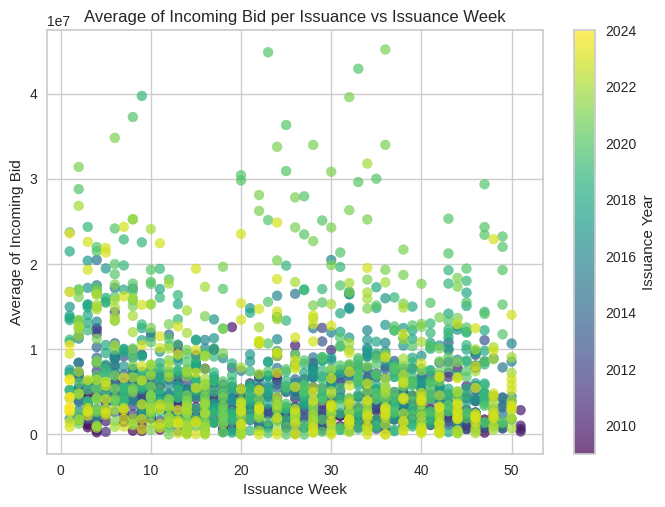

In [11]:
# import matplotlib.pyplot as plt

grouped_series02 = df_train00.groupby(['issuance_date', 'issued_series']).agg({
    'incoming_bid': 'mean', #average
    'issuance_week': 'mean',
    'issuance_year': 'mean'
}).reset_index()

# Convert 'issuance_year' to integer
grouped_series02['issuance_year'] = grouped_series02['issuance_year'].astype(int)


# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(grouped_series02['issuance_week'], grouped_series02['incoming_bid'], s=50, c=grouped_series02['issuance_year'], alpha=0.7, cmap='viridis')
plt.title('Average of Incoming Bid per Issuance vs Issuance Week')
plt.xlabel('Issuance Week')
plt.ylabel('Average of Incoming Bid')
plt.colorbar(label='Issuance Year')
plt.grid(True)
plt.show()

In [ ]:
# sns.catplot(x='issued_series', y='incoming_bid', data=grouped_series02,
#                 kind='boxen', col='issuance_year', col_wrap=2)

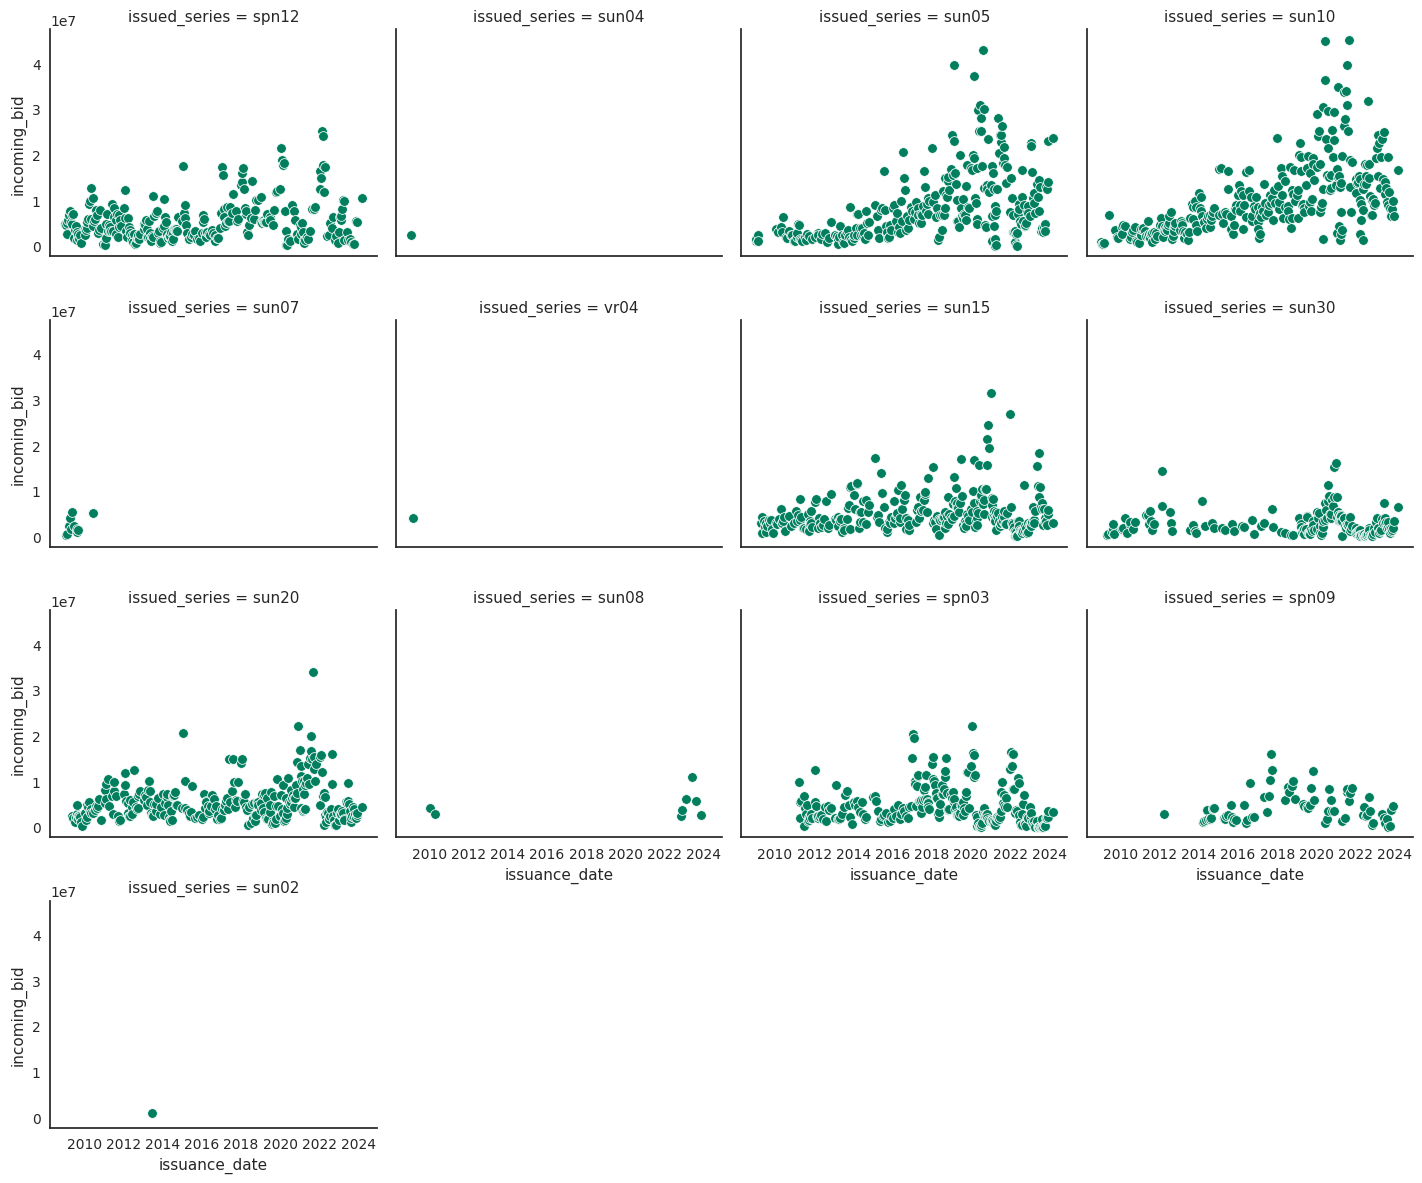

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.set_style("white")

# Create a FacetGrid and use map to create subplots based on 'FacetVar'
ch01 = sns.FacetGrid(df_train00, col='issued_series', col_wrap=4, height=3, aspect=1.2)
ch01.map(sns.scatterplot, 'issuance_date', 'incoming_bid', color='#007e5d')

# Show the plot
# plt.show()


In [13]:
corr_matrix = df_train00.corr()
corr_matrix['incoming_bid'].sort_values(ascending=False)

incoming_bid        1.000000
issuance_year       0.250720
investment_grade    0.193464
bi_covid            0.177634
eid_weeks          -0.010889
srbi_issuance      -0.032336
vix_indicator      -0.049145
issuance_week      -0.097369
gso_issuance       -0.100766
monthfrac          -0.101849
Name: incoming_bid, dtype: float64

In [14]:
df_train01 = df_train00[~df_train00['issued_series'].isin(['sun04', 'sun02', 'vr04', 'spn09', 'sun07'])]

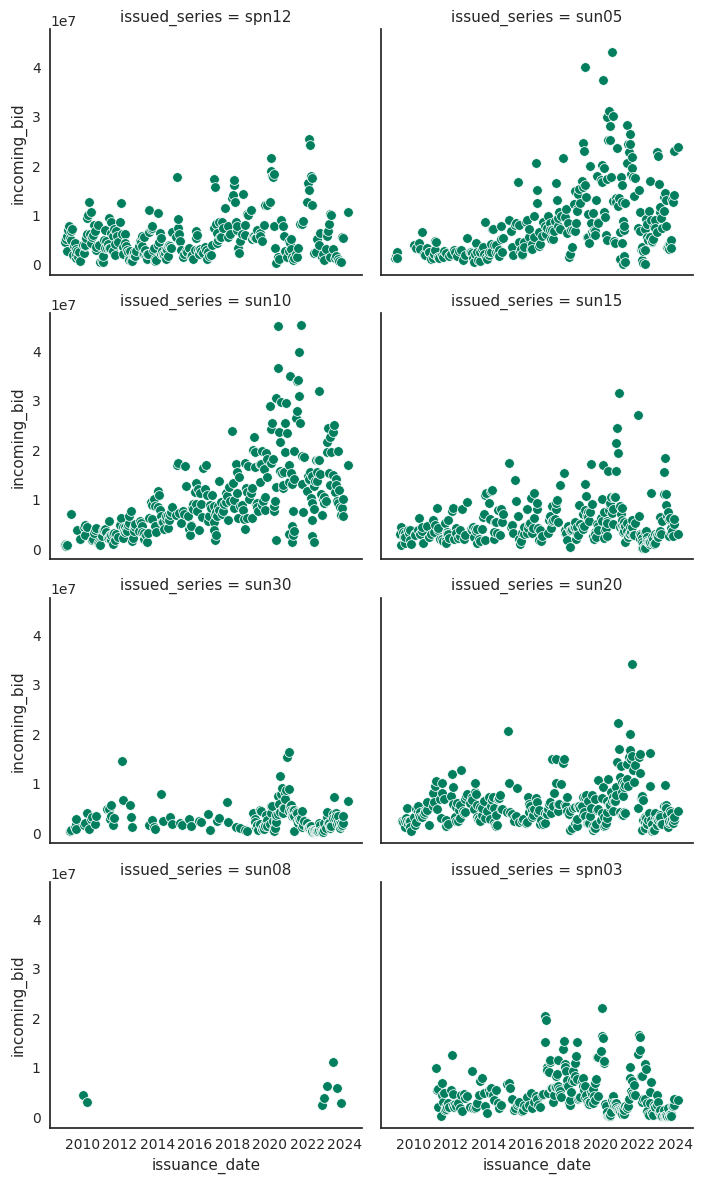

In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.set_style("white")

# Create a FacetGrid and use map to create subplots based on 'FacetVar'
ch02 = sns.FacetGrid(df_train01, col='issued_series', col_wrap=2, height=3, aspect=1.2)
ch02.map(sns.scatterplot, 'issuance_date', 'incoming_bid', color='#007e5d')

# Show the plot
# plt.show()


In [16]:
# Get the order of categories
issd_series = df_train01['issued_series'].unique()

# Sort the order
issd_series.sort()

# Create a boxplot with sorted order
# sns.boxplot(x='issued_series', y='incoming_bid', data=df_train01,
#             order=issd_series, hue='issuance_year')

# sns.boxplot(x='issued_series', y='incoming_bid', data=df_train01,
#             order=issd_series)
# plt.show()

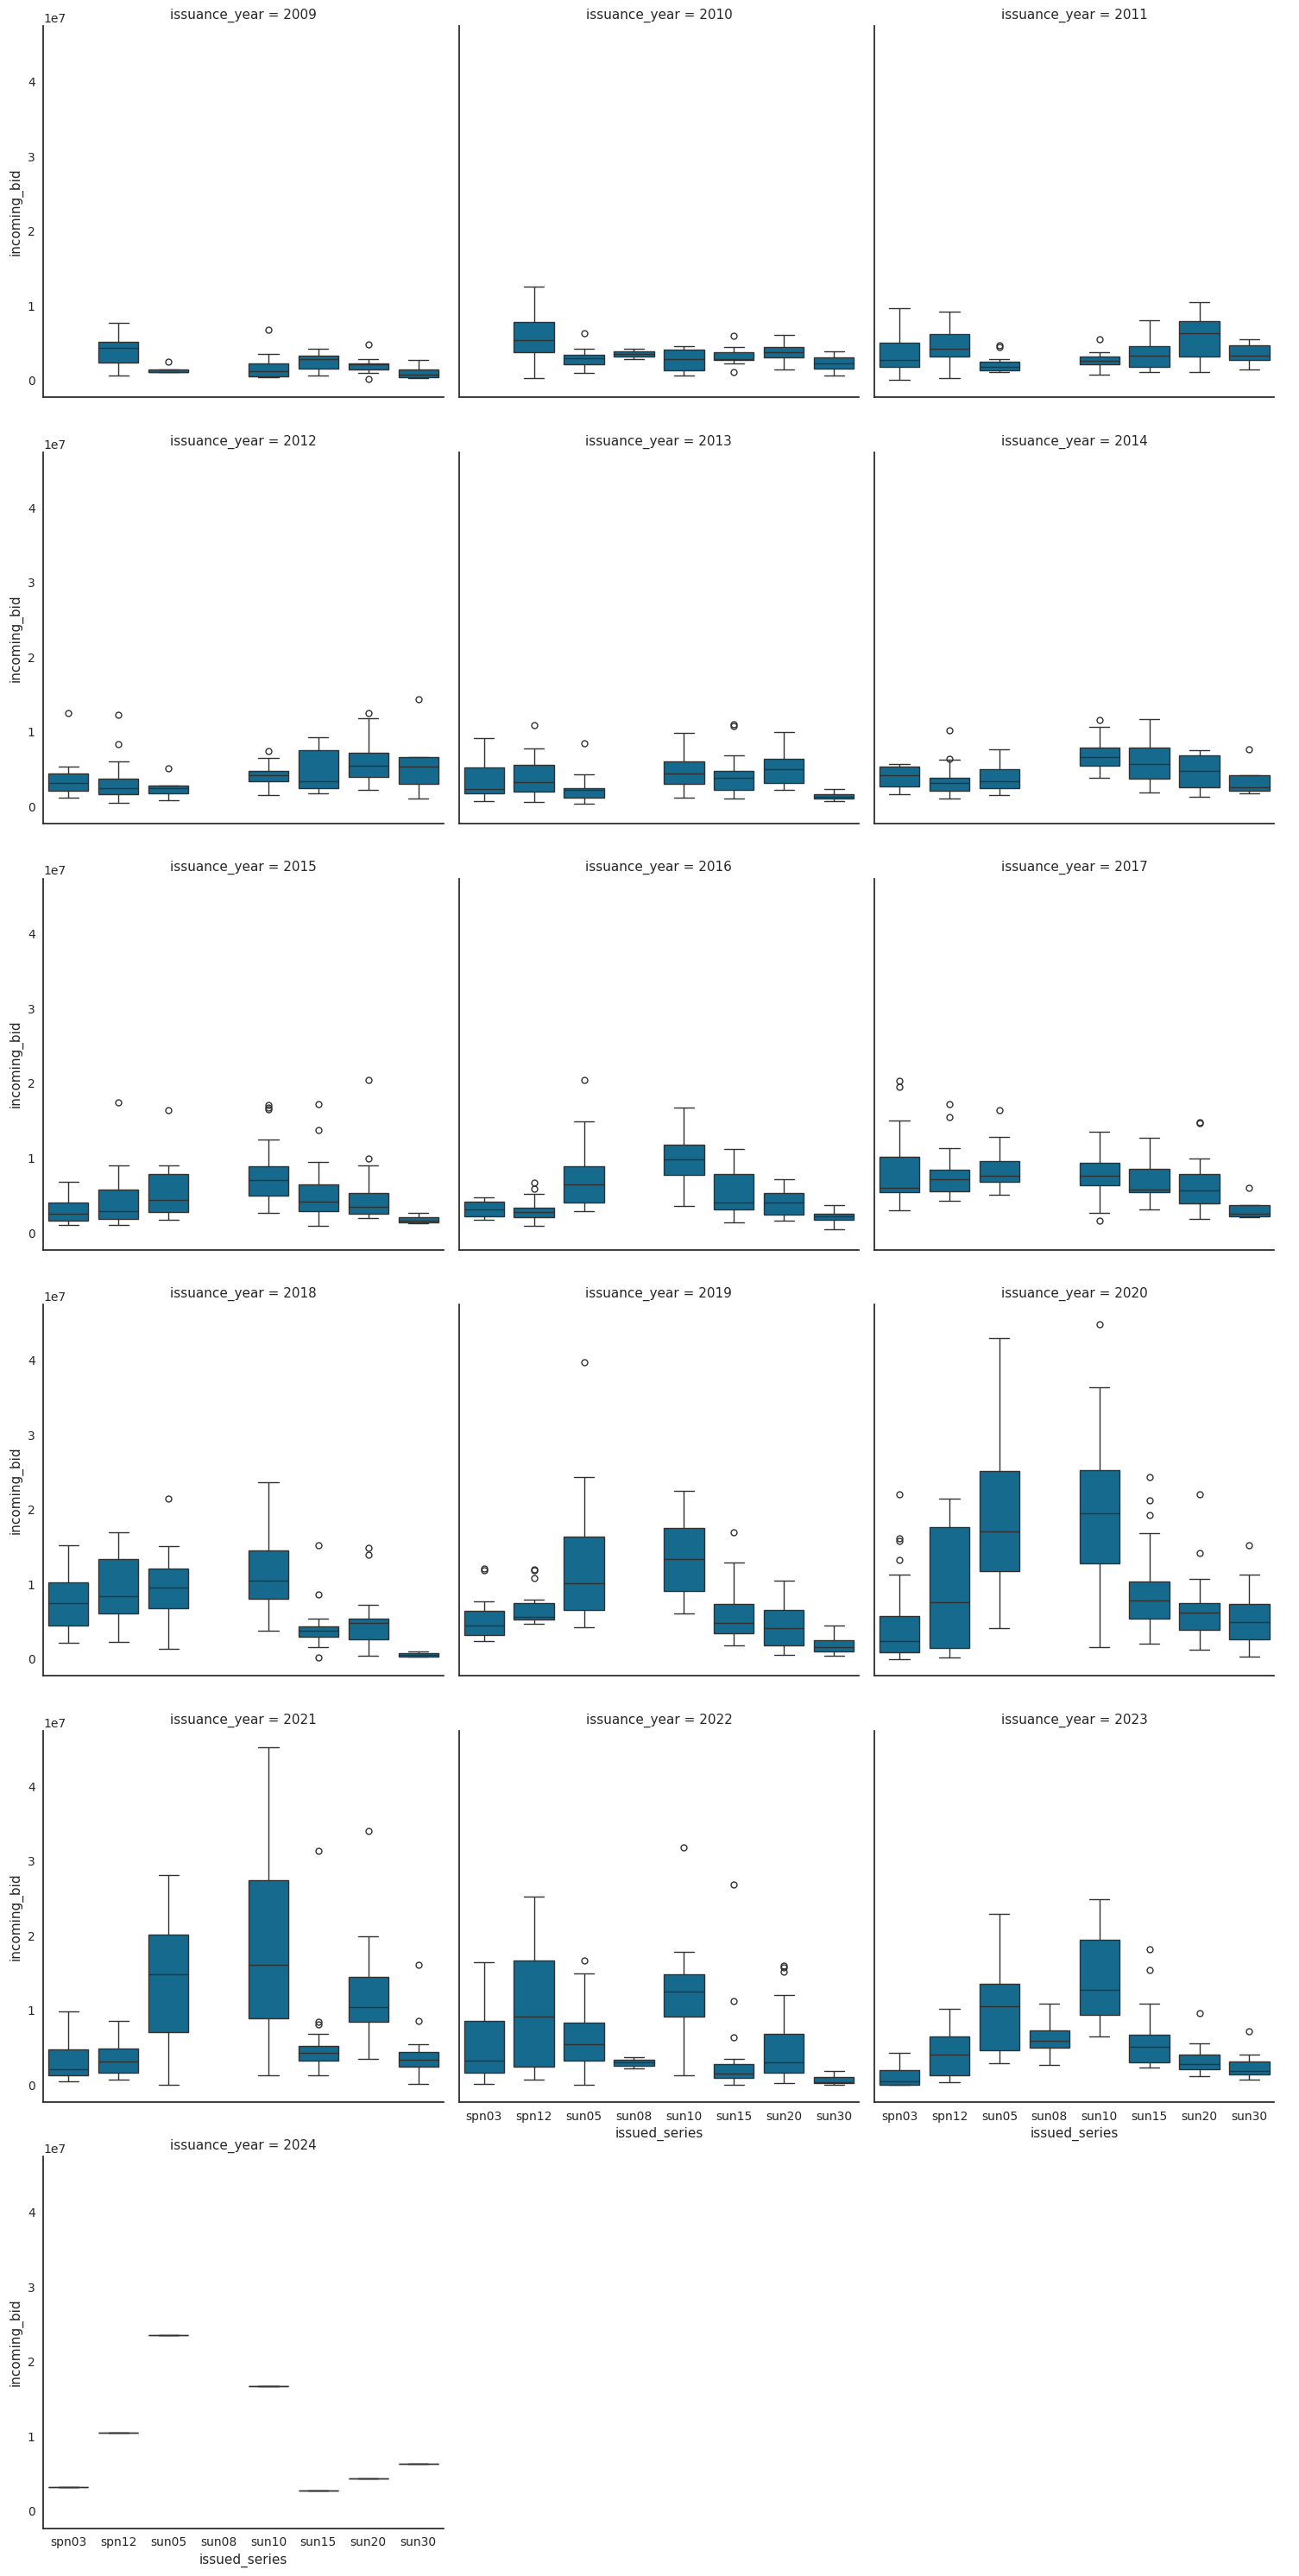

In [17]:
sns.catplot(x='issued_series', y='incoming_bid', data=df_train01,
                order=issd_series, kind='box', col='issuance_year', col_wrap=3)

### Split: Biased

In [ ]:
# df_train02 = df_train01.sample(frac=0.9, random_state=786)
# df_unseen01 = df_train01.drop(df_train02.index)

# df_train02.reset_index(drop=True, inplace=True)
# df_unseen01.reset_index(drop=True, inplace=True)

# print('Data for Modeling: ' + str(df_train02.shape))
# print('Unseen Data For Predictions: ' + str(df_unseen01.shape))

In [ ]:
# print("Train: \n{} \n\nTest: \n{}".format(df_train02['issued_series'].value_counts(), df_unseen01['issued_series'].value_counts()))

### Split: Stratified

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming df is your DataFrame and 'target_column' is the target variable
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(df_train01, df_train01['issued_series']):
    # Explicitly reset the index
    df_train02 = df_train01.iloc[train_index]
    df_unseen01 = df_train01.iloc[test_index]

# Explicitly reset the index for df_train02 and df_test01
# df_train02 = df_train02.reset_index(drop=True)
# df_unseen01 = df_unseen01.reset_index(drop=True)

# Display the shapes of the resulting sets (optional)
print("Train set shape:", df_train02.shape)
print("Test set shape:", df_unseen01.shape)

Train set shape: (1624, 12)
Test set shape: (181, 12)


In [19]:
print("Train: \n{} \n\nTest: \n{}".format(df_train02['issued_series'].value_counts(), df_unseen01['issued_series'].value_counts()))

Train: 
sun10    263
sun20    258
sun15    245
spn12    245
sun05    239
spn03    214
sun30    153
sun08      7
Name: issued_series, dtype: int64 

Test: 
sun10    29
sun20    29
sun15    27
spn12    27
sun05    27
spn03    24
sun30    17
sun08     1
Name: issued_series, dtype: int64


In [20]:
# Identifying duplicates
duplicates = df_train02[df_train02.index.duplicated()]
print("Rows with duplicate indices:")
print(duplicates)


Rows with duplicate indices:
Empty DataFrame
Columns: [issued_series, issuance_date, issuance_year, issuance_week, monthfrac, eid_weeks, srbi_issuance, vix_indicator, bi_covid, gso_issuance, investment_grade, incoming_bid]
Index: []


In [21]:
# Identifying duplicates
duplicates = df_unseen01[df_unseen01.index.duplicated()]
print("Rows with duplicate indices:")
print(duplicates)

Rows with duplicate indices:
Empty DataFrame
Columns: [issued_series, issuance_date, issuance_year, issuance_week, monthfrac, eid_weeks, srbi_issuance, vix_indicator, bi_covid, gso_issuance, investment_grade, incoming_bid]
Index: []


# Methods

## Setup

In [22]:
session01 = setup(data=df_train02, target='incoming_bid', session_id=123,
                  test_data=df_unseen01,
                  categorical_features=['issued_series'],
                  ignore_features = ['issuance_date'])

,Description,Value
0,Session id,123
1,Target,incoming_bid
2,Target type,Regression
3,Original data shape,"(1805, 12)"
4,Transformed data shape,"(1805, 18)"
5,Transformed train set shape,"(1624, 18)"
6,Transformed test set shape,"(181, 18)"
7,Ignore features,1
8,Numeric features,9
9,Categorical features,1


## Compare Models

In [23]:
best01 = compare_models(sort = 'mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2356530.9625,12146278137856.0000,3457091.9250,0.6695,1.1736,0.9891,0.2250
lightgbm,Light Gradient Boosting Machine,2399928.4091,12423506501924.5098,3496458.8488,0.6623,1.1934,0.9633,0.6580
et,Extra Trees Regressor,2359376.0776,12440311196030.1328,3509794.0863,0.6601,1.1108,0.9190,0.3750
rf,Random Forest Regressor,2399411.8608,12547430529507.6250,3509901.8972,0.6597,1.1882,1.0602,0.5990
gbr,Gradient Boosting Regressor,2927673.9629,17926236093060.5703,4209239.7319,0.5141,1.3240,1.2514,0.1980
knn,K Neighbors Regressor,3114417.8000,19806865588224.0000,4429753.8250,0.4565,1.3191,1.8242,0.1100
dt,Decision Tree Regressor,2931373.6908,20646458747564.2656,4523032.4047,0.4350,1.3214,1.1808,0.1110
ridge,Ridge Regression,3711715.4925,26908161935561.6172,5170138.4157,0.2692,1.4925,2.5552,0.0600
lasso,Lasso Regression,3718634.2787,26909308999909.1484,5170666.7377,0.2690,1.4953,2.5555,0.0690
lr,Linear Regression,3719171.1572,26911157783777.5742,5170876.5123,0.2690,1.4892,2.5558,1.0140


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Features

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2399669.1447,12064405454342.3867,3473385.3017,0.6786,0.6455,0.6585
1,1888425.3020,7043624905939.5127,2653982.8383,0.7474,1.7078,0.8243
2,2226723.9514,9513281013879.5371,3084360.7140,0.7219,1.6700,1.5293
3,2379944.1045,9569001818354.0039,3093380.3223,0.6903,1.4021,0.7949
4,2600050.5398,16275089520762.7461,4034239.6459,0.6019,1.1124,0.7097
5,2260358.9238,10850018919379.9082,3293936.6903,0.7681,0.5844,0.5584
6,2526822.6009,17141983571395.2031,4140287.8609,0.5231,1.2347,0.6754
7,2407284.3206,13900983753633.5898,3728402.3058,0.6614,1.4033,1.5862
8,2633513.9512,13003556841524.0137,3606044.4869,0.6142,1.4193,1.2202


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

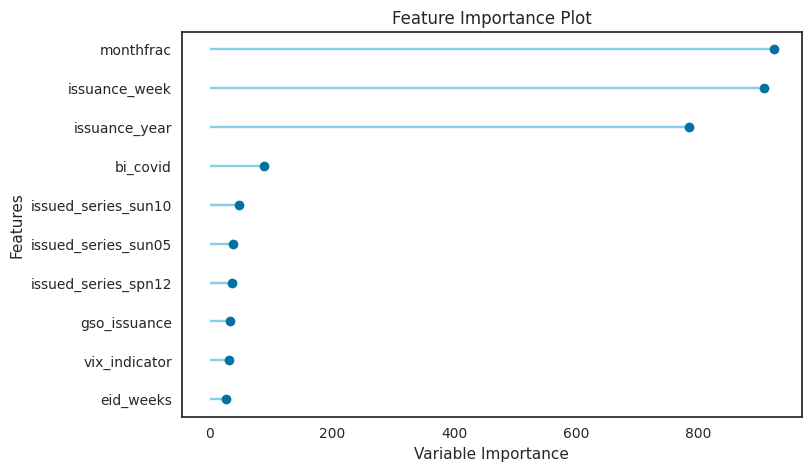

In [24]:
plot_model(create_model('lightgbm'), plot='feature')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2357951.5000,14341080350720.0000,3786962.0000,0.6179,0.5862,0.5871
1,1873919.6250,7696877092864.0000,2774324.5000,0.7240,1.7657,0.6708
2,2225126.0000,9415792001024.0000,3068516.2500,0.7248,1.6494,1.6279
3,2323664.0000,10079116984320.0000,3174762.5000,0.6738,1.2843,0.6996
4,2500436.5000,15052004392960.0000,3879691.2500,0.6318,1.3133,0.6229
5,2161284.0000,9414014664704.0000,3068226.7500,0.7988,0.5640,0.5153
6,2310639.0000,14337163919360.0000,3786444.7500,0.6012,0.9083,0.5673
7,2894228.2500,18343092289536.0000,4282883.5000,0.5531,1.5415,2.6126
8,2476859.2500,10954121150464.0000,3309701.0000,0.6750,1.3761,0.9914


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

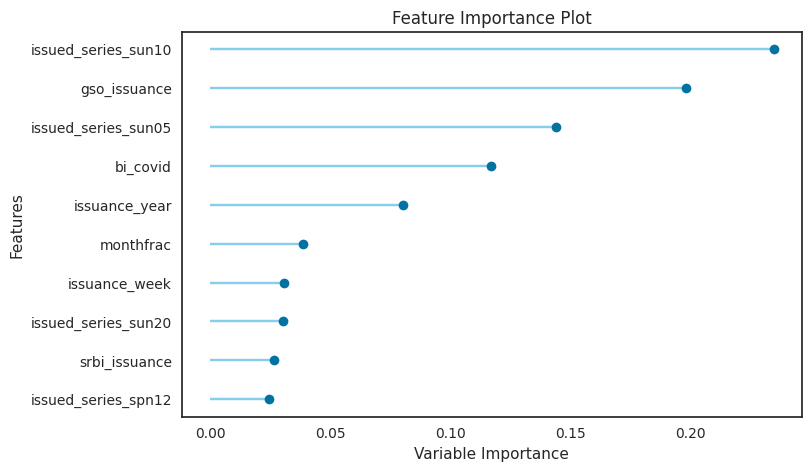

In [25]:
plot_model(create_model('xgboost'), plot='feature')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2418675.7117,13745397640052.8281,3707478.6095,0.6338,0.5543,0.5605
1,1909564.7239,8904959595519.4961,2984117.8924,0.6806,1.5080,0.6749
2,2133839.8221,9113619879463.0000,3018877.2548,0.7336,1.6267,2.1704
3,2158115.5276,9915436354383.8340,3148878.5868,0.6791,1.0485,0.5807
4,2501123.6235,14479528574473.6855,3805197.5736,0.6458,1.2968,0.5861
5,2283717.0864,11156027531989.7559,3340064.0012,0.7615,0.5549,0.5422
6,2440577.4815,15839699578335.4473,3979912.0064,0.5594,1.1716,0.5581
7,2698892.2901,15453519818850.2402,3931096.5161,0.6235,1.2476,1.6016
8,2546401.9414,13128751389083.3477,3623361.8904,0.6105,1.4362,1.1157


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

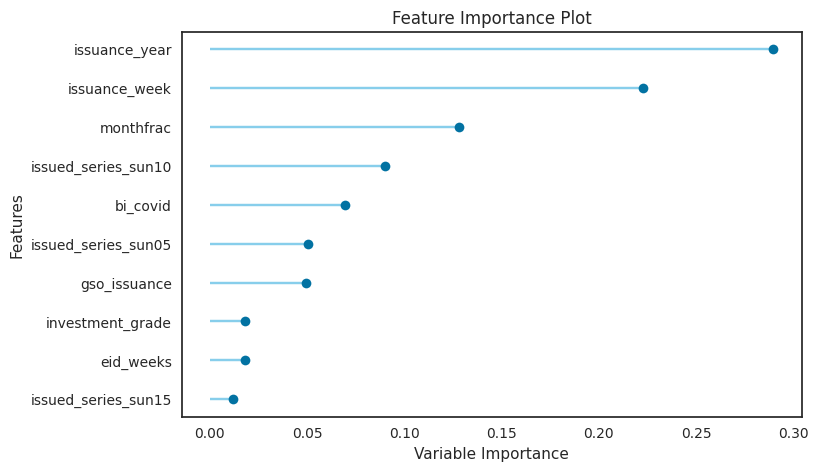

In [26]:
plot_model(create_model('et'), plot='feature')

# Algorithms

## Light Gradient Boosting Machine

### Raw -- 66.23%

In [27]:
# train a xgb model with default params
lightgbm_raw = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2399669.1447,12064405454342.3867,3473385.3017,0.6786,0.6455,0.6585
1,1888425.3020,7043624905939.5127,2653982.8383,0.7474,1.7078,0.8243
2,2226723.9514,9513281013879.5371,3084360.7140,0.7219,1.6700,1.5293
3,2379944.1045,9569001818354.0039,3093380.3223,0.6903,1.4021,0.7949
4,2600050.5398,16275089520762.7461,4034239.6459,0.6019,1.1124,0.7097
5,2260358.9238,10850018919379.9082,3293936.6903,0.7681,0.5844,0.5584
6,2526822.6009,17141983571395.2031,4140287.8609,0.5231,1.2347,0.6754
7,2407284.3206,13900983753633.5898,3728402.3058,0.6614,1.4033,1.5862
8,2633513.9512,13003556841524.0137,3606044.4869,0.6142,1.4193,1.2202


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning -- 60.59%

In [28]:
# tune hyperparameters of lightgbm
lightgbm_tuned = tune_model(lightgbm_raw)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2680191.3565,15634251424857.5625,3954017.1250,0.5834,0.7209,0.7230
1,2287622.1549,9828588973145.0684,3135058.0494,0.6475,1.7971,0.9525
2,2518117.6438,11622355564164.6133,3409157.6033,0.6603,1.7689,1.9680
3,2453148.2919,10500968327574.0527,3240519.7619,0.6602,1.3057,0.7536
4,2654168.5636,15990961737068.0156,3998870.0575,0.6088,1.1895,0.7335
5,2713220.4492,13858684829357.6270,3722725.4572,0.7038,0.6727,0.6250
6,2731880.6006,19161862733300.4570,4377426.4966,0.4670,1.3301,0.7433
7,2739026.5237,16662302437680.3848,4081948.3629,0.5941,1.4550,0.9565
8,2966999.8830,16257107455863.3184,4032010.3492,0.5177,1.5158,1.5478


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Modifying -- 67.21%

In [29]:

# Define a more comprehensive tuning grid for LightGBM
lightgbm_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.01, 0.001],
    'reg_lambda': [1, 1.5, 2, 3, 4],
    'num_leaves': [15, 31, 63, 127],
    'min_split_gain': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample_freq': [0, 1, 2],
}

# Tune LightGBM model with custom grid and optimize for R2
lightgbm_modified = tune_model(lightgbm_raw, custom_grid=lightgbm_grid, optimize='mse', early_stopping=True, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2477797.2852,13217155892383.1816,3635540.6603,0.6478,0.6823,0.6526
1,1901732.1664,7124953547875.1621,2669260.8617,0.7445,1.7425,0.9782
2,2306957.1539,10052274563423.8223,3170532.2208,0.7062,1.7261,1.6806
3,2288198.5769,9424418220018.6543,3069921.5332,0.6950,1.3864,0.7144
4,2615277.6384,15553564987908.1562,3943800.8302,0.6195,1.2114,0.7112
5,2196085.4353,9930728428861.0430,3151305.8292,0.7877,0.5539,0.5057
6,2467303.9545,15578908325442.1895,3947012.5824,0.5666,1.2514,0.6504
7,2486609.6695,14105519824937.6602,3755731.5965,0.6564,1.4179,1.2772
8,2612053.8774,11912673082039.3984,3451474.0448,0.6466,1.4506,1.4143


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


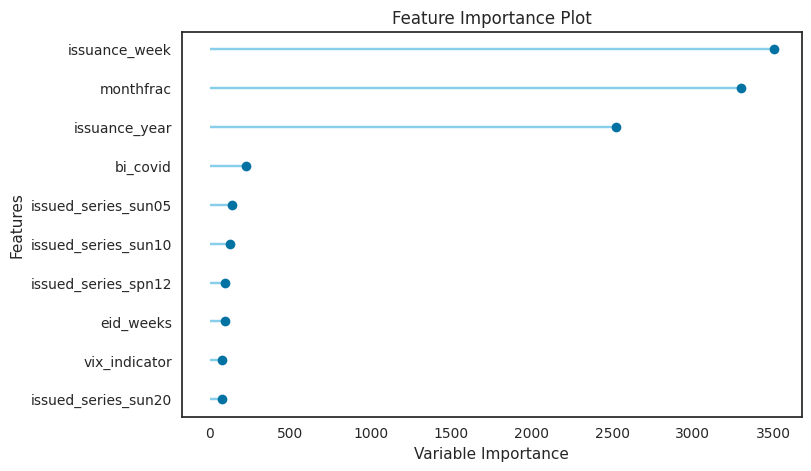

In [30]:
plot_model(lightgbm_modified, plot = 'feature')

### Bagging -- 65.13%

In [31]:
# ensemble with bagging
lightgbm_bagged = ensemble_model(lightgbm_raw, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2455117.6915,13508576474039.5488,3675401.5392,0.6401,0.6144,0.6733
1,1849703.1458,6931943144634.9297,2632858.3602,0.7514,1.6542,0.8485
2,2305603.9171,9812644528627.6133,3132514.0907,0.7132,1.7164,1.1904
3,2362858.9341,9927295048849.5938,3150761.0269,0.6787,1.1952,0.7674
4,2669194.6038,16652438808556.7324,4080739.9830,0.5927,1.1925,0.7057
5,2301137.5672,11120627171775.0996,3334760.4369,0.7623,0.5632,0.5685
6,2511128.6945,16553789387549.7539,4068634.8309,0.5395,1.3291,0.6758
7,2487167.3149,14728784409508.2402,3837809.8454,0.6412,1.3782,1.3828
8,2705460.5384,13804617279026.1875,3715456.5371,0.5905,1.4362,1.2980


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Boosting -- 66.62%

In [32]:
# ensemble with boosting
lightgbm_boosted = ensemble_model(lightgbm_raw, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2485500.1882,13576493001699.7676,3684629.2896,0.6383,0.6098,0.6863
1,1987253.3338,7555967756071.3613,2748812.0627,0.7290,1.7614,0.9668
2,2399382.0271,10040515141280.8418,3168677.1911,0.7065,1.7168,1.2470
3,2358695.7473,10256502531103.8555,3202577.4825,0.6681,1.1358,0.7672
4,2606968.1419,15401642800287.8652,3924492.6806,0.6233,1.2761,0.7638
5,2228462.3305,9803048067507.5234,3130981.9654,0.7905,0.5627,0.5752
6,2515941.8362,14812393625839.6855,3848687.2601,0.5879,1.3758,0.6694
7,2611865.1563,15221687225087.6133,3901498.0745,0.6292,1.4004,1.1023
8,2715893.4762,12746515118626.5801,3570226.1999,0.6218,1.4264,1.2346


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Extreme Gradient Boosting

### Raw -- 66.95%

In [33]:
# train a xgb model with default params
xgb_raw = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2357951.5000,14341080350720.0000,3786962.0000,0.6179,0.5862,0.5871
1,1873919.6250,7696877092864.0000,2774324.5000,0.7240,1.7657,0.6708
2,2225126.0000,9415792001024.0000,3068516.2500,0.7248,1.6494,1.6279
3,2323664.0000,10079116984320.0000,3174762.5000,0.6738,1.2843,0.6996
4,2500436.5000,15052004392960.0000,3879691.2500,0.6318,1.3133,0.6229
5,2161284.0000,9414014664704.0000,3068226.7500,0.7988,0.5640,0.5153
6,2310639.0000,14337163919360.0000,3786444.7500,0.6012,0.9083,0.5673
7,2894228.2500,18343092289536.0000,4282883.5000,0.5531,1.5415,2.6126
8,2476859.2500,10954121150464.0000,3309701.0000,0.6750,1.3761,0.9914


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning -- 66.87%

In [34]:
# tune hyperparameters of xgb
xgb_tuned = tune_model(xgb_raw)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2420496.0000,14956920569856.0000,3867417.7500,0.6015,0.6344,0.6348
1,1997436.6250,9095598833664.0000,3015891.0000,0.6738,1.6477,0.6747
2,2023318.7500,7971983065088.0000,2823470.0000,0.7670,1.6329,0.7914
3,2281557.5000,10118975455232.0000,3181033.7500,0.6725,1.2869,0.6879
4,2490778.5000,13911792287744.0000,3729851.5000,0.6597,1.2991,0.6620
5,2346983.0000,11572106756096.0000,3401780.0000,0.7526,0.6042,0.5413
6,2470462.7500,14645662318592.0000,3826965.2500,0.5926,1.2684,0.5646
7,2700106.0000,15693240074240.0000,3961469.5000,0.6177,1.4065,0.9136
8,2649092.2500,12671655084032.0000,3559726.7500,0.6241,1.5109,1.1886


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Modifying -- 67.75%

In [35]:
# define a more comprehensive tuning grid for XGBoost
xgb_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.01, 0.001],
    'reg_lambda': [1, 1.5, 2, 3, 4]
}

# tune model with custom grid and optimize for R2
xgb_modified = tune_model(xgb_raw, custom_grid=xgb_grid, optimize='mse', early_stopping=True, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2279211.2500,12018208735232.0000,3466728.7500,0.6798,0.5603,0.5932
1,1711098.2500,5943741906944.0000,2437979.0000,0.7868,1.5938,0.6835
2,2232088.7500,10097851891712.0000,3177711.7500,0.7048,1.7214,1.3316
3,2163319.2500,8791536435200.0000,2965052.5000,0.7155,1.1972,0.6684
4,2617615.7500,15364699193344.0000,3919783.0000,0.6242,1.2781,0.6947
5,2197228.7500,10282666557440.0000,3206659.7500,0.7802,0.5461,0.5581
6,2381436.5000,15724706791424.0000,3965439.0000,0.5626,1.2472,0.5980
7,2591871.7500,14815506464768.0000,3849091.7500,0.6391,1.3864,1.4494
8,2683240.7500,13203537920000.0000,3633667.2500,0.6083,1.4466,1.1791


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


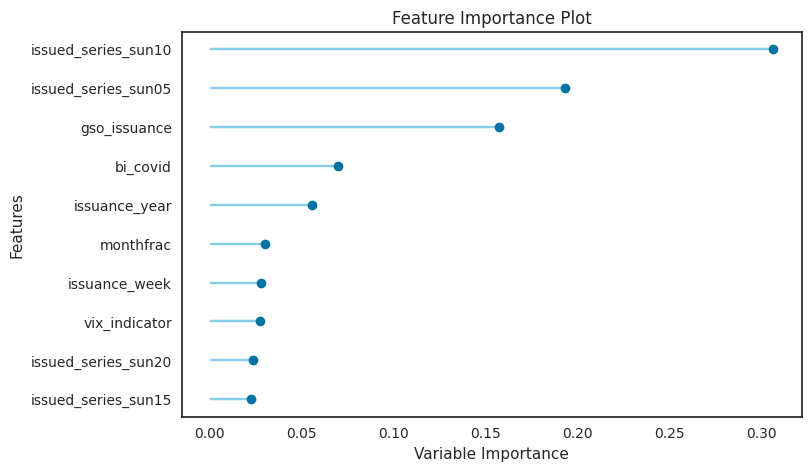

In [45]:
plot_model(xgb_modified, plot = 'feature')

### Bagging -- 66.77%

In [36]:
# ensemble with bagging
xgb_bagged = ensemble_model(xgb_raw, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2373005.0000,14070001434624.0000,3751000.0000,0.6251,0.6233,0.5958
1,1824477.5000,7079904411648.0000,2660809.0000,0.7461,1.6096,0.6769
2,2250895.2500,9495404085248.0000,3081461.2500,0.7224,1.7315,1.2436
3,2282203.7500,9941544861696.0000,3153021.5000,0.6783,1.1711,0.7091
4,2509868.7500,15046049529856.0000,3878923.7500,0.6320,1.2272,0.6094
5,2223273.5000,11043040395264.0000,3323107.0000,0.7640,0.5486,0.5064
6,2351093.7500,15913278504960.0000,3989145.0000,0.5573,1.2772,0.5940
7,2556797.7500,15209776283648.0000,3899971.2500,0.6295,1.4102,1.6777
8,2600049.7500,12472615436288.0000,3531659.0000,0.6300,1.3990,1.2208


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Boosting -- 67.71%

In [37]:
# ensemble with boosting
xgb_boosted = ensemble_model(xgb_raw, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2467922.0000,14379525341184.0000,3792034.5000,0.6169,0.6012,0.6168
1,1783321.8750,7268684791808.0000,2696049.7500,0.7393,1.7221,0.6641
2,2098137.7500,9194295001088.0000,3032209.5000,0.7312,1.7382,1.0809
3,2315535.7500,10045324525568.0000,3169436.0000,0.6749,1.1957,0.6819
4,2496686.5000,14483643695104.0000,3805738.2500,0.6457,1.2993,0.6954
5,2175560.0000,10416972365824.0000,3227533.5000,0.7773,0.5267,0.5153
6,2385414.0000,14693091508224.0000,3833156.7500,0.5913,1.1968,0.6012
7,2637712.2500,15297306165248.0000,3911177.0000,0.6273,1.4156,1.4298
8,2570670.2500,11580455518208.0000,3403006.7500,0.6564,1.4217,1.1869


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

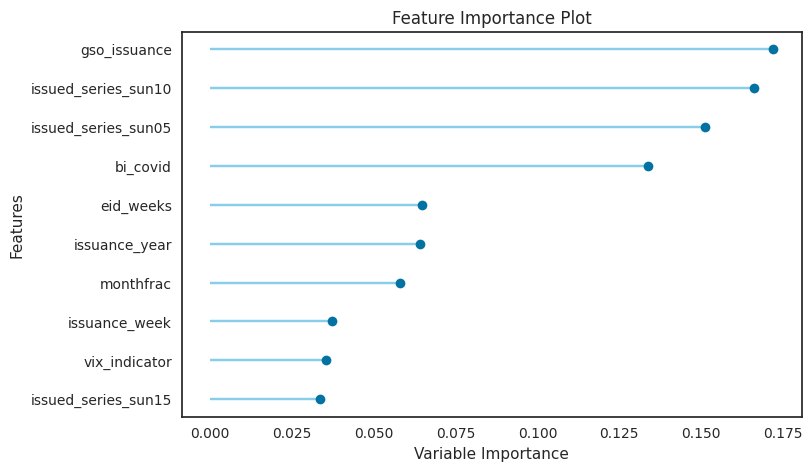

In [38]:
plot_model(xgb_boosted, plot = 'feature')

## Extra Trees Regressor

### Raw -- 66.01%

In [39]:
# train a et model with default params
et_raw = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2418675.7117,13745397640052.8281,3707478.6095,0.6338,0.5543,0.5605
1,1909564.7239,8904959595519.4961,2984117.8924,0.6806,1.5080,0.6749
2,2133839.8221,9113619879463.0000,3018877.2548,0.7336,1.6267,2.1704
3,2158115.5276,9915436354383.8340,3148878.5868,0.6791,1.0485,0.5807
4,2501123.6235,14479528574473.6855,3805197.5736,0.6458,1.2968,0.5861
5,2283717.0864,11156027531989.7559,3340064.0012,0.7615,0.5549,0.5422
6,2440577.4815,15839699578335.4473,3979912.0064,0.5594,1.1716,0.5581
7,2698892.2901,15453519818850.2402,3931096.5161,0.6235,1.2476,1.6016
8,2546401.9414,13128751389083.3477,3623361.8904,0.6105,1.4362,1.1157


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning -- 54.67%

In [40]:
# tune hyperparameters of et
et_tuned = tune_model(et_raw)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2780801.3703,16764228696849.4473,4094414.3289,0.5533,0.6624,0.7945
1,2167634.6263,9296616100458.9453,3049035.2737,0.6666,1.7957,1.0811
2,2847068.7354,14712280127542.8535,3835659.0213,0.5699,1.9131,5.6577
3,2463069.5155,11310905576690.3555,3363168.9783,0.6339,1.3383,0.8387
4,3026613.3992,20176074136057.8867,4491778.5048,0.5065,1.3878,0.9721
5,2729563.9738,16700993013879.3086,4086684.8440,0.6430,0.6263,0.7165
6,2893876.5899,21824522065810.6992,4671672.2986,0.3929,1.3758,0.8509
7,2911789.9079,19315769462650.8828,4394970.9285,0.5294,1.4365,2.6130
8,2995396.5252,17086768929503.8711,4133614.5115,0.4931,1.5611,1.7243


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Modifying -- 61.17%

In [41]:
# define a more comprehensive tuning grid for Random Forest Regressor
et_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 4, 8, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', None],
    'bootstrap': [True, False]
}

# Tune model with the optimized grid and optimize for Mean Squared Error (mse)
et_modified = tune_model(et_raw, custom_grid=et_grid, optimize='mse', early_stopping=True, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2537032.3070,13360870135167.2598,3655252.4038,0.6440,0.6209,0.7240
1,1978199.3070,7996725519627.3076,2827848.2137,0.7132,1.7551,1.1461
2,2440714.7522,11538476701787.4414,3396833.3344,0.6627,1.7742,2.8454
3,2301023.2938,10492361644897.6191,3239191.5110,0.6604,1.2800,0.7461
4,2838255.4922,18039280842175.4883,4247267.4559,0.5587,1.3698,0.8563
5,2489944.8044,14780996228944.6660,3844606.1214,0.6841,0.5818,0.6283
6,2644149.8274,17878085949045.8594,4228248.5676,0.5027,1.3085,0.7713
7,2894994.8543,18896215011375.0703,4346977.6870,0.5397,1.3647,2.4766
8,2642995.1146,13465481765035.3223,3669534.2709,0.6005,1.4563,1.5385


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Bagging -- 66.42%

In [42]:
# ensemble with bagging
et_bagged = ensemble_model(et_raw, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2440093.7923,13472564288842.3965,3670499.1880,0.6410,0.5635,0.5888
1,1780499.0573,7103797719186.2793,2665295.0529,0.7452,1.5726,0.7121
2,2267952.6674,10063481391782.2969,3172299.0704,0.7058,1.7369,2.4208
3,2259946.5329,10212848212299.2539,3195754.7172,0.6695,1.1728,0.6576
4,2494720.4136,13954402329205.8281,3735559.1722,0.6587,1.2645,0.6359
5,2322064.0074,11816757220739.0117,3437551.0499,0.7474,0.5503,0.5610
6,2424573.7574,16395921643907.4980,4049187.7758,0.5439,1.2294,0.5939
7,2666378.0583,15492259330573.3027,3936020.7482,0.6226,1.2757,1.7818
8,2420372.5271,11306131774799.2246,3362459.1856,0.6646,1.4039,1.1514


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Boosting -- 67.12%

In [43]:
# ensemble with boosting
et_boosted = ensemble_model(et_raw, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2423870.3119,13939463374354.9961,3733559.0760,0.6286,0.5656,0.5986
1,1884016.2255,8515034235521.7412,2918053.1584,0.6946,1.6109,0.7159
2,2092714.8712,8706838549243.3379,2950735.2557,0.7455,1.6562,2.3202
3,2189544.3080,9345404631816.7305,3057025.4549,0.6976,1.2651,0.6580
4,2486195.7157,14456025594635.5430,3802108.0462,0.6464,1.3023,0.6515
5,2246825.4614,10720098696596.0840,3274156.1808,0.7709,0.5307,0.5278
6,2381229.9959,14651839292186.2148,3827772.1056,0.5924,1.2678,0.6141
7,2710318.9198,15534756582743.9336,3941415.5557,0.6216,1.2722,1.5493
8,2576449.1606,12460768827479.4922,3529981.4203,0.6303,1.3937,1.2346


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

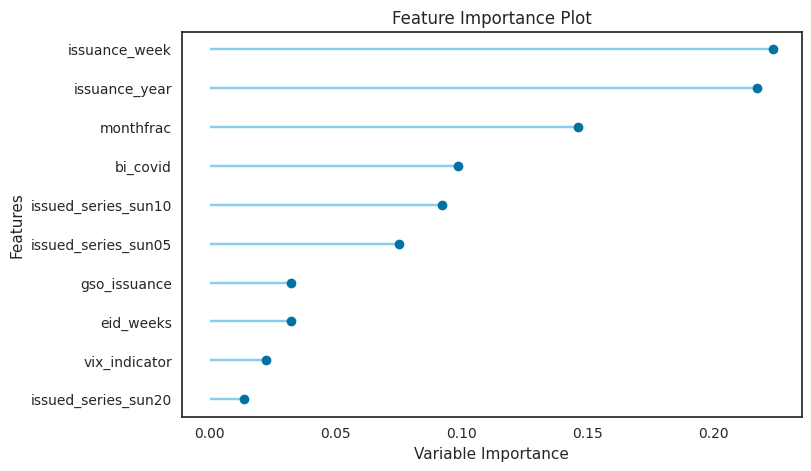

In [44]:
plot_model(et_boosted, plot = 'feature')

# Choosen

## Blended -- 56.45%

In [46]:
# Blend the Boosted Ensembles
blended = blend_models(estimator_list=[lightgbm_modified, xgb_modified, et_boosted], fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2265630.8757,11665597883647.2891,3415493.7979,0.6892,0.5474,0.5740
1,1708775.4022,6120600543616.9170,2473984.7501,0.7805,1.6078,0.5725
2,2083147.6403,8603926508123.3662,2933245.0474,0.7485,1.6287,1.0451
3,2074970.2354,8189024434052.5088,2861647.1540,0.7350,1.0151,0.6552
4,2455807.5503,14025839675961.8789,3745108.7669,0.6569,1.2613,0.6438
5,2124325.3502,9537992758926.6816,3088364.0911,0.7961,0.5174,0.5114
6,2306970.0526,14513340431029.0918,3809637.8346,0.5963,1.2338,0.5811
7,2483331.1492,13588437355407.9375,3686249.7685,0.6690,1.3545,1.3799
8,2467053.4829,10674296949934.5859,3267154.2587,0.6833,1.4112,1.2445


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [47]:
predict_model(blended);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2370500.1556,12773205527049.1328,3573962.1608,0.5645,0.9599,0.5634


In [ ]:
# plot_model(blended, plot = 'residuals')

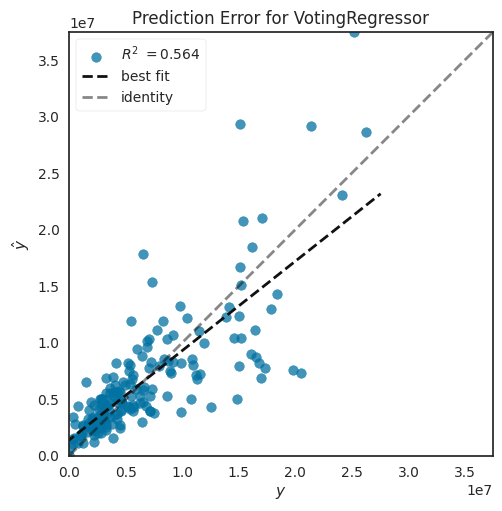

In [48]:
plot_model(blended, plot = 'error')

## Stacked -- 54.61%

In [49]:
stacked = stack_models(estimator_list=[lightgbm_modified, xgb_modified, et_boosted])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2344739.5873,12051279894523.8887,3471495.3398,0.6789,0.5735,0.5908
1,1740237.6292,6469156923980.1396,2543453.7393,0.7680,1.6590,0.7598
2,2052448.4448,8256279967786.3037,2873374.3174,0.7587,1.5297,0.7567
3,2088581.2058,8248591806376.7549,2872036.1778,0.7331,1.1151,0.6349
4,2438939.1056,13830448846411.9883,3718931.1430,0.6617,1.2300,0.6182
5,2122950.0419,9484645828226.9199,3079715.2187,0.7973,0.5216,0.4924
6,2339922.0729,14217289307406.6270,3770582.0913,0.6045,1.1841,0.6120
7,2490570.5437,13415156314189.3086,3662670.6533,0.6732,1.3832,0.9665
8,2403127.5245,10449637248348.5488,3232589.8670,0.6900,1.3695,1.1519


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [50]:
predict_model(stacked);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2401038.3933,13311329983431.6543,3648469.5399,0.5461,0.9985,0.5049


In [ ]:
# plot_model(stacked, plot = 'residuals')

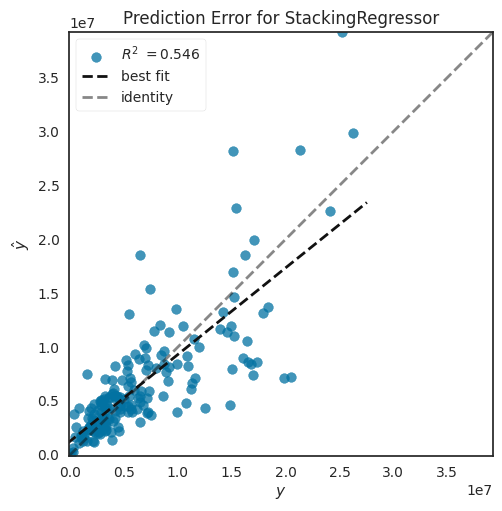

In [51]:
plot_model(stacked, plot = 'error')

## Finalizing -- 93.65%

In [52]:
final = finalize_model(blended)
predict_model(final);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,965507.3088,1862598392547.4248,1364770.4542,0.9365,0.9877,0.2253


In [53]:
save_model(final, '20240121_blended01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['issuance_year', 'issuance_week',
                                              'monthfrac', 'eid_weeks',
                                              'srbi_issuance', 'vix_indicator',
                                              'bi_covid', 'gso_issuance',
                                              'investment_grade'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['issued_series'],
                                     transformer=SimpleImpute...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=11,
                                                            max_leaves=

# Lelang 16 Jan 2024

## Load

In [54]:
lelang20240116 = pd.read_excel('/content/drive/MyDrive/00database/db_monthfrac.xlsx', sheet_name='lelang20240116')
lelang20240116['issuance_date'] = pd.to_datetime(lelang20240116['issuance_date'], format='%d/%m/%Y')
lelang20240116.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issued_series     7 non-null      object        
 1   issuance_date     7 non-null      datetime64[ns]
 2   issuance_year     7 non-null      int64         
 3   issuance_week     7 non-null      int64         
 4   monthfrac         7 non-null      int64         
 5   eid_weeks         7 non-null      int64         
 6   srbi_issuance     7 non-null      int64         
 7   vix_indicator     7 non-null      int64         
 8   bi_covid          7 non-null      int64         
 9   gso_issuance      7 non-null      int64         
 10  investment_grade  7 non-null      int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 744.0+ bytes


## Predict

In [55]:
# predict model on new_data
predict03= predict_model(final, data = lelang20240116)
predict03

,issued_series,issuance_date,issuance_year,issuance_week,monthfrac,eid_weeks,srbi_issuance,vix_indicator,bi_covid,gso_issuance,investment_grade,prediction_label
0,spn03,2024-01-16,2024,3,3,0,1,0,0,0,1,4.511279e+06
1,spn12,2024-01-16,2024,3,12,0,1,0,0,0,1,8.361549e+06
2,sun05,2024-01-16,2024,3,62,0,1,0,0,0,1,1.881798e+07
3,sun10,2024-01-16,2024,3,120,0,1,0,0,0,1,1.838911e+07
4,sun15,2024-01-16,2024,3,172,0,1,0,0,0,1,6.133507e+06
5,sun20,2024-01-16,2024,3,232,0,1,0,0,0,1,4.022046e+06
6,sun30,2024-01-16,2024,3,365,0,1,0,0,0,1,5.436322e+06


In [56]:
# @title Lelang 20240116: Per series

# !pip install --upgrade pip
# !pip install tabulate

import tabulate

# Incoming bid per series
predict04 = predict03[['issued_series', 'issuance_date', 'prediction_label']]

# Create a new column with formatted dates
predict04['issuance_date'] = predict04['issuance_date'].dt.strftime('%Y-%m-%d')

# Format the 'prediction_label' column
predict04['prediction_label'] = predict04['prediction_label'].apply(lambda x: '{:,.2f} trillion'.format(x / 1_000_000))

# Convert the DataFrame to a list of dictionaries for tabulate
table_data = predict04.to_dict(orient='records')

# Specify the column alignments
column_alignments = {'issued_series': 'left', 'issuance_date': 'center', 'prediction_label': 'right'}

# Display the formatted DataFrame using tabulate
formatted_table = tabulate.tabulate(table_data, headers="keys", floatfmt=".2f", showindex=False, colalign=list(column_alignments.values()), tablefmt="pipe")

print(formatted_table)

| issued_series   |  issuance_date  |   prediction_label |
|:----------------|:---------------:|-------------------:|
| spn03           |   2024-01-16    |      4.51 trillion |
| spn12           |   2024-01-16    |      8.36 trillion |
| sun05           |   2024-01-16    |     18.82 trillion |
| sun10           |   2024-01-16    |     18.39 trillion |
| sun15           |   2024-01-16    |      6.13 trillion |
| sun20           |   2024-01-16    |      4.02 trillion |
| sun30           |   2024-01-16    |      5.44 trillion |


In [58]:
# @title Lelang 20240116: Total

# Sum total incoming bid
incoming_bid = predict03['prediction_label'].sum()

# Round to two decimal places
rounded_bid = round(incoming_bid, 2)
formatted_rounded_bid = 'Rp{:,.2f} million'.format(rounded_bid)

# Adjust to the nearest thousand
formatted_incoming_bid = 'Rp{:,.2f} trillion'.format(rounded_bid / 1000000)

output_message = f"""
According to a blended machine learning algorithm model with an R-squared value of 56.45%,
the estimated incoming bid for the next issuance is approximately {formatted_rounded_bid}
or {formatted_incoming_bid}.
"""

print(output_message)



According to a blended machine learning algorithm model with an R-squared value of 56.45%,
the estimated incoming bid for the next issuance is approximately Rp65,671,788.14 million
or Rp65.67 trillion.

